<a href="https://colab.research.google.com/github/just3shot/Learning/blob/main/Aaron_Tan_Multi_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>**Multi-classification of **</h1>
- Male (M)
- Attractive (A) 
- Smiling (S)

8 classes in total:
- MAS M!AS MA!S M!A!S
- !MAS !M!AS !MA!S !M!A!S

## Importing Celeba Dataset from Kaggle

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
# Install Kaggle API
!pip install -q kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# To prevent some error that pops up
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Where my resource come from
!kaggle datasets download -d jessicali9530/celeba-dataset

 99% 1.20G/1.21G [00:12<00:00, 91.9MB/s]
100% 1.21G/1.21G [00:12<00:00, 102MB/s] 


## Importing Libaries for Data Visualisation

In [ ]:
import pandas as pd
import numpy as np
import cv2 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Data Exploration

In [ ]:
!ls

celeba-dataset.zip  kaggle.json  sample_data


In [ ]:
# Unzips the file so to obtain the csv file
!unzip -qq celeba-dataset.zip

In [ ]:
!ls

celeba-dataset.zip    list_attr_celeba.csv     list_landmarks_align_celeba.csv
img_align_celeba.zip  list_bbox_celeba.csv     sample_data
kaggle.json	      list_eval_partition.csv


In [ ]:
# Unzips the file so to obtain the csv file
!unzip -qq img_align_celeba.zip

In [ ]:
# Remove the zips once extracted
!rm celeba-dataset.zip
!rm img_align_celeba.zip

In [ ]:
!ls

img_align_celeba      list_bbox_celeba.csv	       sample_data
kaggle.json	      list_eval_partition.csv
list_attr_celeba.csv  list_landmarks_align_celeba.csv


In [ ]:
df = pd.read_csv("list_attr_celeba.csv")
df.head(5)

,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,000001.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,...,-1,1,1,-1,1,-1,1,-1,-1,1
1,000002.jpg,-1,-1,-1,1,-1,-1,-1,1,-1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1
2,000003.jpg,-1,-1,-1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,1,-1,-1,-1,-1,-1,1
3,000004.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,...,-1,-1,1,-1,1,-1,1,1,-1,1
4,000005.jpg,-1,1,1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1


In [ ]:
df1 = df[["image_id", "Male", "Attractive", "Smiling"]]
df1.head(5)

,image_id,Male,Attractive,Smiling
0,000001.jpg,-1,1,1
1,000002.jpg,-1,-1,1
2,000003.jpg,1,-1,-1
3,000004.jpg,-1,1,-1
4,000005.jpg,-1,1,-1


In [ ]:
# DataFrame.replace(to_replace=None, value=None, inplace=False, limit=None, regex=False, method='pad')
df1.replace(to_replace=-1, value=0, inplace=True)
df1.head(5)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,image_id,Male,Attractive,Smiling
0,000001.jpg,0,1,1
1,000002.jpg,0,0,1
2,000003.jpg,1,0,0
3,000004.jpg,0,1,0
4,000005.jpg,0,1,0


In [ ]:
# df1["Labels"] = df1[["Male", "Attractive", "Smiling"]].values.tolist()
# df1.head()

In [ ]:
def class_sorter(x):
  if (x["Male"] == 0) & (x["Attractive"] == 0) & (x["Smiling"] == 0):
    return np.int(0)
  elif (x["Male"] == 0) & (x["Attractive"] == 0) & (x["Smiling"] == 1):
    return np.int(1)
  elif (x["Male"] == 0) & (x["Attractive"] == 1) & (x["Smiling"] == 0):
    return np.int(2)
  elif (x["Male"] == 0) & (x["Attractive"] == 1) & (x["Smiling"] == 1):
    return np.int(3)
  elif (x["Male"] == 1) & (x["Attractive"] == 0) & (x["Smiling"] == 0):
    return np.int(4)
  elif (x["Male"] == 1) & (x["Attractive"] == 0) & (x["Smiling"] == 1):
    return np.int(5)
  elif (x["Male"] == 1) & (x["Attractive"] == 1) & (x["Smiling"] == 0):
    return np.int(6)
  else:
    return np.int(7)

In [ ]:
df1["Class"] = df1.apply(class_sorter, axis=1)
df1.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,image_id,Male,Attractive,Smiling,Class
0,000001.jpg,0,1,1,3
1,000002.jpg,0,0,1,1
2,000003.jpg,1,0,0,4
3,000004.jpg,0,1,0,2
4,000005.jpg,0,1,0,2


In [ ]:
df1 = df1.join(pd.get_dummies(df1["Class"]))
df1.head()

,image_id,Male,Attractive,Smiling,Class,0,1,2,3,4,5,6,7
0,000001.jpg,0,1,1,3,0,0,0,1,0,0,0,0
1,000002.jpg,0,0,1,1,0,1,0,0,0,0,0,0
2,000003.jpg,1,0,0,4,0,0,0,0,1,0,0,0
3,000004.jpg,0,1,0,2,0,0,1,0,0,0,0,0
4,000005.jpg,0,1,0,2,0,0,1,0,0,0,0,0


In [ ]:
df1["Class_Encoded"] = df1[[0,1,2,3,4,5,6,7]].values.tolist()
df1.head()

,image_id,Male,Attractive,Smiling,Class,0,1,2,3,4,5,6,7,Class_Encoded
0,000001.jpg,0,1,1,3,0,0,0,1,0,0,0,0,"[0, 0, 0, 1, 0, 0, 0, 0]"
1,000002.jpg,0,0,1,1,0,1,0,0,0,0,0,0,"[0, 1, 0, 0, 0, 0, 0, 0]"
2,000003.jpg,1,0,0,4,0,0,0,0,1,0,0,0,"[0, 0, 0, 0, 1, 0, 0, 0]"
3,000004.jpg,0,1,0,2,0,0,1,0,0,0,0,0,"[0, 0, 1, 0, 0, 0, 0, 0]"
4,000005.jpg,0,1,0,2,0,0,1,0,0,0,0,0,"[0, 0, 1, 0, 0, 0, 0, 0]"


In [ ]:
# I tried to manually one-hot encoding my class column. Turns out I didnt need to use it in the end.
df1["Class_Encoded"] = df1["Class_Encoded"].apply(lambda x: np.array(x))
print(df1["Class_Encoded"][0].shape)

(8,)


In [ ]:
df1.groupby(["Male","Attractive", "Smiling"]).size().reset_index(name="Quantity")

In [ ]:
df1.groupby("Class").size().reset_index(name="Quantity")

,Class,Quantity
0,0,20208
1,1,17703
2,2,34086
3,3,46168
4,4,38426
5,5,22429
6,6,12210
7,7,11369


In [ ]:
s1= df1[df1["Class"] == 0].sample(n=1250, random_state=42)
s2= df1[df1["Class"] == 1].sample(n=1250, random_state=42)
s3= df1[df1["Class"] == 2].sample(n=1250, random_state=42)
s4= df1[df1["Class"] == 3].sample(n=1250, random_state=42)
s5= df1[df1["Class"] == 4].sample(n=1250, random_state=42)
s6= df1[df1["Class"] == 5].sample(n=1250, random_state=42)
s7= df1[df1["Class"] == 6].sample(n=1250, random_state=42)
s8= df1[df1["Class"] == 7].sample(n=1250, random_state=42)

data = pd.concat([s1,s2,s3,s4,s5,s6,s7,s8]).sort_index()
print(data.shape)
data.head()

(10000, 14)


,image_id,Male,Attractive,Smiling,Class,0,1,2,3,4,5,6,7,Class_Encoded
11,000012.jpg,1,1,1,7,0,0,0,0,0,0,0,1,"[0, 0, 0, 0, 0, 0, 0, 1]"
17,000018.jpg,0,0,1,1,0,1,0,0,0,0,0,0,"[0, 1, 0, 0, 0, 0, 0, 0]"
24,000025.jpg,1,0,0,4,0,0,0,0,1,0,0,0,"[0, 0, 0, 0, 1, 0, 0, 0]"
27,000028.jpg,0,1,1,3,0,0,0,1,0,0,0,0,"[0, 0, 0, 1, 0, 0, 0, 0]"
37,000038.jpg,1,1,1,7,0,0,0,0,0,0,0,1,"[0, 0, 0, 0, 0, 0, 0, 1]"


In [ ]:
list_of_sample_image_id = data["image_id"].values
print(len(list_of_sample_image_id))
list_of_sample_image_id

10000


array(['000012.jpg', '000018.jpg', '000025.jpg', ..., '202548.jpg',
       '202566.jpg', '202572.jpg'], dtype=object)

In [ ]:
import cv2
x_data = np.array([])
for i, j in enumerate(list_of_sample_image_id):
  photo = cv2.imread(f"./img_align_celeba/{j}", 0) # insert comments here
  photo = photo.flatten()
  if len(x_data) == 0:
    x_data = photo
  else:
    x_data = np.vstack((x_data, photo))
x_data.shape # (250*8, 218*178*3)

(10000, 38804)

In [ ]:
y_labels = data["Class"]
y_labels[:10]

11     7
17     1
24     4
27     3
37     7
142    7
190    3
196    7
296    6
308    1
Name: Class, dtype: int64

In [ ]:
import keras
import tensorflow as tf
from keras.models import Model, Sequential
from keras.utils import to_categorical
from keras import optimizers
from keras.layers import *
from keras.optimizers import Adam, SGD

In [ ]:
# Shuffle
from sklearn.utils import shuffle
x_data, y_labels = shuffle(x_data, y_labels, random_state=42)

# Train Test Split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_labels, test_size=0.1, random_state=42) # 10% of the data is used to test

x_train.shape, y_train.shape

((9000, 38804), (9000,))

In [ ]:
# Reshape and normalize
x_train = x_train.reshape(x_train.shape[0], 218, 178, 1).astype('float32')
x_test = x_test.reshape(x_test.shape[0], 218, 178, 1).astype('float32')

x_train /= 255.0 # To make the values between 0 and 1
x_test /= 255.0

print(x_train.shape)
x_train.ndim

(9000, 218, 178, 1)


4

In [ ]:
y_train = tf.keras.utils.to_categorical(y_train) # 1 hot encoding
y_test = tf.keras.utils.to_categorical(y_test)

y_train.shape

(9000, 8)

In [ ]:
# from sklearn.preprocessing import OneHotEncoder
# onehot_encoder = OneHotEncoder(sparse=False)
# onehot_encoded = onehot_encoder.fit_transform(integer_encoded)

In [ ]:
y_train.shape, y_test.shape

((9000, 8), (1000, 8))

In [ ]:
# Setting up our Network Hyper Parameters

learning_rate = 0.001 
training_epochs = 10
batch_size = 125
num_classes = 8

In [ ]:
input_shape = (218,178,1)

# Model
Inp=Input(shape=input_shape)
x = Conv2D(32, kernel_size=(3, 3), activation='relu',name = 'Conv_01')(Inp)
x = MaxPooling2D(pool_size=(2, 2),name = 'MaxPool_01')(x)
x = Conv2D(64, (3, 3), activation='relu',name = 'Conv_02')(x)
x = MaxPooling2D(pool_size=(2, 2),name = 'MaxPool_02')(x)
x = Conv2D(64, (3, 3), activation='relu',name = 'Conv_03')(x)
x = Flatten(name = 'Flatten_01')(x)
x = Dense(64, activation='relu',name = 'Dense_01')(x)
x = Dropout(0.5,name = 'Dropout_02')(x)
output = Dense(num_classes, activation='sigmoid',name = 'Dense_02')(x)

In [ ]:
model = Model(Inp,output)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         (None, 218, 178, 1)       0         
_________________________________________________________________
Conv_01 (Conv2D)             (None, 216, 176, 32)      320       
_________________________________________________________________
MaxPool_01 (MaxPooling2D)    (None, 108, 88, 32)       0         
_________________________________________________________________
Conv_02 (Conv2D)             (None, 106, 86, 64)       18496     
_________________________________________________________________
MaxPool_02 (MaxPooling2D)    (None, 53, 43, 64)        0         
_________________________________________________________________
Conv_03 (Conv2D)             (None, 51, 41, 64)        36928     
_________________________________________________________________
Flatten_01 (Flatten)         (None, 133824)            0         
__________

In [ ]:
model.compile(loss=tf.keras.losses.binary_crossentropy,
              optimizer= Adam(lr=learning_rate, decay=1e-6),
              metrics=['accuracy'])

#model.compile(optimizers.rmsprop(lr=learning_rate, decay=1e-6),loss="binary_crossentropy",metrics=["accuracy"])

In [ ]:
hist = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=training_epochs,
          verbose=1,
          callbacks = None,
          validation_data=(x_test, y_test))

Train on 9000 samples, validate on 1000 samples
Epoch 1/10
9000/9000 [==============================] - 21s 2ms/step - loss: 0.4293 - acc: 0.1688 - val_loss: 0.3332 - val_acc: 0.3890
Epoch 2/10
9000/9000 [==============================] - 19s 2ms/step - loss: 0.3460 - acc: 0.3342 - val_loss: 0.2708 - val_acc: 0.5280
Epoch 3/10
9000/9000 [==============================] - 19s 2ms/step - loss: 0.3008 - acc: 0.4370 - val_loss: 0.2439 - val_acc: 0.5830
Epoch 4/10
9000/9000 [==============================] - 19s 2ms/step - loss: 0.2697 - acc: 0.5010 - val_loss: 0.2349 - val_acc: 0.5840
Epoch 5/10
9000/9000 [==============================] - 19s 2ms/step - loss: 0.2422 - acc: 0.5660 - val_loss: 0.2254 - val_acc: 0.6020
Epoch 6/10
9000/9000 [==============================] - 19s 2ms/step - loss: 0.2211 - acc: 0.6160 - val_loss: 0.2178 - val_acc: 0.6240
Epoch 7/10
9000/9000 [==============================] - 19s 2ms/step - loss: 0.2058 - acc: 0.6492 - val_loss: 0.2203 - val_acc: 0.6080
Epoch 8

In [ ]:
def plot_train(hist):
    h = hist.history
    if 'acc' in h:
        meas='acc'
        loc='lower right'
    else:
        meas='loss'
        loc='upper right'
    plt.plot(hist.history[meas])
    plt.plot(hist.history['val_'+meas])
    plt.title('model '+meas)
    plt.ylabel(meas)
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc=loc)

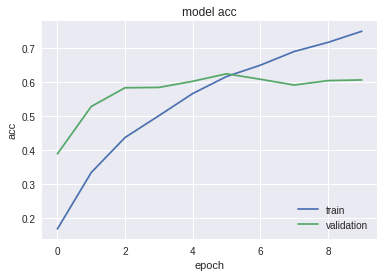

In [ ]:
plot_train(hist)

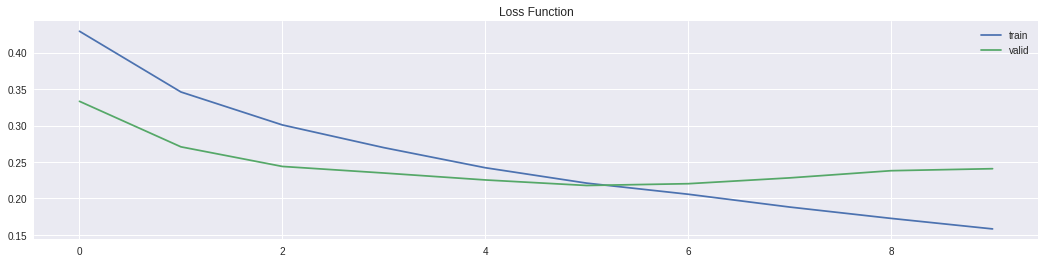

In [ ]:
# Plot loss function value through epochs
plt.figure(figsize=(18, 4))
plt.plot(hist.history['loss'], label = 'train')
plt.plot(hist.history['val_loss'], label = 'valid')
plt.legend()
plt.title('Loss Function')
plt.show()

In [ ]:
model.evaluate(x_test,y_test)

1000/1000 [==============================] - 1s 1ms/step


[0.2408484172821045, 0.606]